### 预训练后+下游数据调优前：t-SNE 聚类模型生成的ModelNet40测试集特征

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

import torch

/home/jerry/miniconda3/envs/clip/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
state_dict = torch.load('pt_MN_test_feats_labels.pth', map_location=torch.device('cpu'))
state_dict.keys()

dict_keys(['feats_test', 'labels_test'])

In [15]:
print(state_dict['feats_test'].shape)
print(state_dict['feats_test'][0].shape)
print(state_dict['labels_test'].shape)
print(state_dict['labels_test'][0].shape)

(2468, 768)
(768,)
(2468,)
()


In [16]:
# 生成t-SNE嵌入特征，feats_test_embedded.shape: (1024, 2)，第一维代表样本数，第二位代表tsne嵌入空间维度
feats_test_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(state_dict['feats_test'])

df = pd.DataFrame()
# y是样本类别，每个样本都有个类别，所以维度是1024
df["label"] = state_dict['labels_test']
df["axis-0"] = feats_test_embedded[:,0]
df["axis-1"] = feats_test_embedded[:,1]

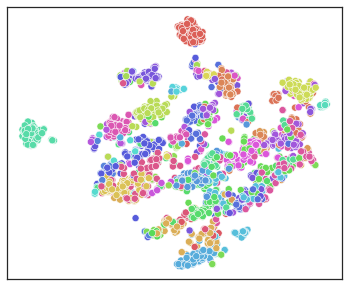

In [17]:
# 控制图片大小
figsize = (6, 5)
fig, ax = plt.subplots(figsize=figsize)
# sns.set_theme(style='white')
mn_ax = sns.scatterplot(ax=ax, x="axis-0", y="axis-1", hue=df.label.tolist(),
                palette=sns.color_palette("hls", 40), s=50,
                data=df, legend=False)#.set(title="CrossFormer Pretrained Features on ModelNet40")
mn_ax.set(xlabel=None)
mn_ax.set(ylabel=None)
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
mn_fig = mn_ax.get_figure()
mn_fig.savefig('pt_mn_feats.pdf', dpi=400.0)

### ViPFormer 预训练后+下游数据调优前：t-SNE 聚类模型生成的ScanObjectNN测试集特征

In [19]:
state_dict = torch.load('pt_SO_test_feats_labels.pth', map_location=torch.device('cpu'))
state_dict.keys()

dict_keys(['feats_test', 'labels_test'])

In [20]:
print(state_dict['feats_test'].shape)
print(state_dict['feats_test'][0].shape)
print(state_dict['labels_test'].shape)
print(state_dict['labels_test'][0].shape)

(581, 768)
(768,)
(581,)
()


In [21]:
# 生成t-SNE嵌入特征，feats_test_embedded.shape: (1024, 2)，第一维代表样本数，第二位代表tsne嵌入空间维度
feats_test_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(state_dict['feats_test'])

df = pd.DataFrame()
# y是样本类别，每个样本都有个类别，所以维度是1024
df["label"] = state_dict['labels_test']
df["axis-0"] = feats_test_embedded[:,0]
df["axis-1"] = feats_test_embedded[:,1]

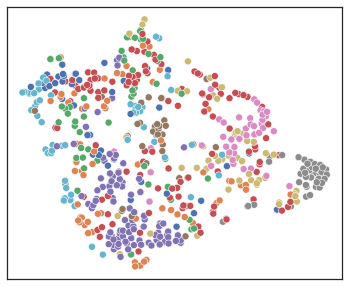

In [22]:
# 控制图片大小
figsize = (6, 5)
fig, ax = plt.subplots(figsize=figsize)
so_ax = sns.scatterplot(ax=ax, x="axis-0", y="axis-1", hue=df.label.tolist(),
                palette=sns.color_palette(palette=None, n_colors=15), s=50,
                data=df, legend=False)#.set(title="CrossFormer Pretrained Features on ScanObjectNN")
so_ax.set(xlabel=None)
so_ax.set(ylabel=None)
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
so_fig = so_ax.get_figure()
so_fig.savefig('pt_so_feats.pdf', dpi=400.0)

### ModelNet40: ViPFormer 调优后特征 t-SNE 可视化

In [24]:
state_dict = torch.load('ft_MN_test_feats_labels.pth', map_location=torch.device('cpu'))
state_dict.keys()

print(state_dict['feats_test'].shape)
print(state_dict['feats_test'][0].shape)
print(state_dict['labels_test'].shape)
print(state_dict['labels_test'][0].shape)

# 生成t-SNE嵌入特征，feats_test_embedded.shape: (1024, 2)，第一维代表样本数，第二位代表tsne嵌入空间维度
feats_test_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(state_dict['feats_test'])

df = pd.DataFrame()
# y是样本类别，每个样本都有个类别，所以维度是1024
df["label"] = state_dict['labels_test']
df["axis-0"] = feats_test_embedded[:,0]
df["axis-1"] = feats_test_embedded[:,1]

(2468, 40)
(40,)
(2468,)
()


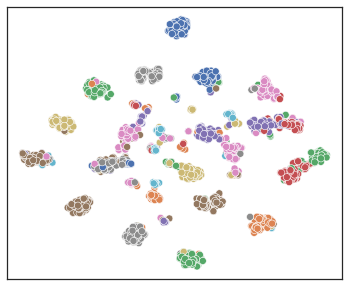

In [25]:
# 控制图片大小
figsize = (6, 5)
fig, ax = plt.subplots(figsize=figsize)
mn_ax = sns.scatterplot(ax=ax, x="axis-0", y="axis-1", hue=df.label.tolist(),
                palette=sns.color_palette(palette=None, n_colors=40), s=50,
                data=df, legend=False)#.set(title="CrossFormer Pretrained Features on ScanObjectNN")
mn_ax.set(xlabel=None)
mn_ax.set(ylabel=None)
plt.xticks([])
plt.yticks([])
plt.show()

mn_fig = mn_ax.get_figure()
mn_fig.savefig('ft_mn_feats.pdf', dpi=400.0)

### ScanObjectNN: ViPFormer 调优后特征 t-SNE 可视化

In [26]:
state_dict = torch.load('ft_SO_test_feats_labels.pth', map_location=torch.device('cpu'))
state_dict.keys()

print(state_dict['feats_test'].shape)
print(state_dict['feats_test'][0].shape)
print(state_dict['labels_test'].shape)
print(state_dict['labels_test'][0].shape)

# 生成t-SNE嵌入特征，feats_test_embedded.shape: (1024, 2)，第一维代表样本数，第二位代表tsne嵌入空间维度
feats_test_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(state_dict['feats_test'])

df = pd.DataFrame()
# y是样本类别，每个样本都有个类别，所以维度是1024
df["label"] = state_dict['labels_test']
df["axis-0"] = feats_test_embedded[:,0]
df["axis-1"] = feats_test_embedded[:,1]

(581, 15)
(15,)
(581,)
()


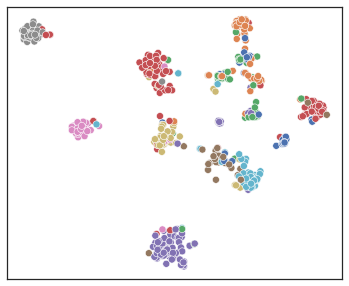

In [27]:
# 控制图片大小
figsize = (6, 5)
fig, ax = plt.subplots(figsize=figsize)
so_ax = sns.scatterplot(ax=ax, x="axis-0", y="axis-1", hue=df.label.tolist(),
                palette=sns.color_palette(palette=None, n_colors=15), s=50,
                data=df, legend=False)#.set(title="CrossFormer Pretrained Features on ScanObjectNN")
so_ax.set(xlabel=None)
so_ax.set(ylabel=None)
plt.xticks([])
plt.yticks([])
plt.show()

so_fig = so_ax.get_figure()
so_fig.savefig('ft_so_feats.pdf', dpi=400.0)

### 使用不同模态数据预训练loss

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('pic4.xlsx', index_col=0)
imc_loss, cmc_loss, both_loss = df.iloc[0].tolist(), df.iloc[1].tolist(), df.iloc[2].tolist()

dict = {
    'Epoch': [i for i in range(300)] * 3,
    'Loss': imc_loss + cmc_loss + both_loss,
    'Modality': ['IMC only']*300 + ['CMC only']*300 + ['IMC & CMC']*300,
}
data = pd.DataFrame(data=dict, columns=['Epoch', 'Loss', 'Modality'])

In [2]:
# df.head()
# print(df.iloc[2].to_list())

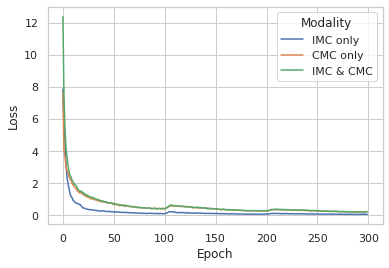

In [3]:
sns.set_theme(style="whitegrid")
lineplot = sns.lineplot(data=data, x='Epoch', y='Loss', hue='Modality')#.set_title('Training Loss using Different Modailities of Data')

In [4]:
fig = lineplot.get_figure()
fig.savefig('different_modality_loss.pdf', dpi=400.0)

### Train scratch vs. Pretrain-Finetune

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('scratch_pt_ft.xlsx', index_col=0)

# mode 1: pt-ft -> m1, mode 2: scratch - m2
m1_mn_acc, m1_mn_loss = df.iloc[0].tolist(), df.iloc[1].tolist()
m1_so_acc, m1_so_loss = df.iloc[2].tolist(), df.iloc[3].tolist()

m2_mn_acc, m2_mn_loss = df.iloc[4].tolist(), df.iloc[5].tolist()
m2_so_acc, m2_so_loss = df.iloc[6].tolist(), df.iloc[7].tolist()

In [19]:
# 画2个图，每个数据集一个图，每个图有 loss + acc
dict_mn_loss = {
    'Epoch': [i for i in range(300)] * 2,
    'Loss': m1_mn_loss + m2_mn_loss, 
    'Learning Style': ['Pretrain-Finetune']*300 + ['Train from Scratch']*300
}
data_mn_loss = pd.DataFrame(data=dict_mn_loss, columns=['Epoch', 'Loss', 'Learning Style'])

dict_mn_acc = {
    'Epoch': [i for i in range(300)] * 2,
    'Accuracy': m1_mn_acc + m2_mn_acc, 
    'Learning Style': ['Pretrain-Finetune']*300 + ['Train from Scratch']*300
}
data_mn_acc = pd.DataFrame(data=dict_mn_acc, columns=['Epoch', 'Accuracy', 'Learning Style'])

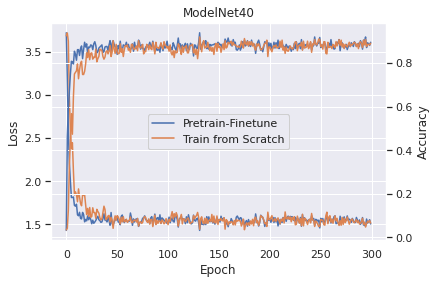

In [49]:
sns.set_theme()
lineplot = sns.lineplot(data=data_mn_loss, x='Epoch', y='Loss', hue='Learning Style')

plt.legend(loc='center')
ax2 = plt.twinx()
lineplot_mn = sns.lineplot(data=data_mn_acc, x='Epoch', y='Accuracy', hue='Learning Style', ax=ax2).set_title('ModelNet40')

plt.legend(loc='center')

In [50]:
fig_mn = lineplot_mn.get_figure()
fig_mn.savefig('scratch_pt_ft_mn.pdf', dpi=400.0)

In [51]:
dict_so_loss = {
    'Epoch': [i for i in range(300)] * 2,
    'Loss': m1_so_loss + m2_so_loss, 
    'Learning Style': ['Pretrain-Finetune']*300 + ['Train from Scratch']*300,
    'Metric': ['Loss']*600
}
data_so_loss = pd.DataFrame(data=dict_so_loss, columns=['Epoch', 'Loss', 'Learning Style', 'Metric'])

dict_so_acc = {
    'Epoch': [i for i in range(300)] * 2,
    'Accuracy': m1_so_acc + m2_so_acc, 
    'Learning Style': ['Pretrain-Finetune']*300 + ['Train from Scratch']*300,
    'Metric': ['Accuracy']*600
}
data_so_acc = pd.DataFrame(data=dict_so_acc, columns=['Epoch', 'Accuracy', 'Learning Style', 'Metric'])

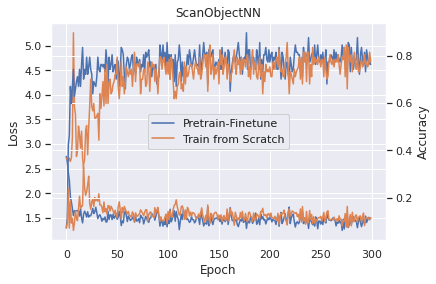

In [52]:
sns.set_theme()
lineplot = sns.lineplot(data=dict_so_loss, x='Epoch', y='Loss', hue='Learning Style')

plt.legend(loc='center')
ax2 = plt.twinx()
lineplot_so = sns.lineplot(data=data_so_acc, x='Epoch', y='Accuracy', hue='Learning Style', ax=ax2).set_title('ScanObjectNN')

plt.legend(loc='center')

In [53]:
fig_so = lineplot_so.get_figure()
fig_so.savefig('scratch_pt_ft_so.pdf', dpi=400.0)